In [10]:
import sys
import os
import shutil
import numpy as np
import glob

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench
sys.path.pop()

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

input_dir = 'input'
input_files_1 = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_files_1]
print(input_samples)

bigsi_dir = 'bigsi'

['2014C-3656', '2014C-3907', '2014C-3850', '2014C-3857', '2014C-3655', '2014C-3600', '2014C-3599', '2014C-3598', '2014C-3840']


In [13]:
def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
    os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])

clean_if_exists(bigsi_dir)

In [14]:
%%bash
# You might need to run this before starting jupyter notebook in your shell
export BIGSI_CONFIG=berkleydb.yaml

In [17]:
command_mccortex = "parallel -j 4 -I% mccortex 31 build --nkmers 74000000 --threads 8 --kmer 31 " \
    + "--mem 20G --sample % --seq2 input/%_1.fastq.gz:input/%_2.fastq.gz bigsi/%.ctx ::: " \
    + ' '.join(input_samples)

print(command_mccortex)
benchmark_results_mccortex = cmdbench.benchmark_command(command_mccortex)

print(benchmark_results_mccortex)
print(benchmark_results_mccortex.get_first_iteration())
print(get_last_n_lines(benchmark_results_mccortex.get_first_iteration().process.stderr_data, 10))

parallel -j 4 -I% mccortex 31 build --nkmers 74000000 --threads 8 --kmer 31 --mem 20G --sample % --seq2 input/%_1.fastq.gz:input/%_2.fastq.gz bigsi/%.ctx ::: 2014C-3656 2014C-3907 2014C-3850 2014C-3857 2014C-3655 2014C-3600 2014C-3599 2014C-3598 2014C-3840
{
  'cpu': {
    'system_time': 143.54999999999998,
    'total_time': 2399.42,
    'user_time': 2255.87,
  },
  'disk': {
    'read_bytes': 2126004224,
    'read_chars': 2309293477,
    'total_bytes': 5306445824,
    'total_chars': 5488923572,
    'write_bytes': 3180441600,
    'write_chars': 3179630095,
  },
  'memory': {
    'max': 4016185344,
    'max_perprocess': 996466688,
  },
  'process': {
    'execution_time': 104.66,
    'exit_code': 0,
    'stderr_data': '[11 Jun 2020 12:15:26-saT][cmd] /home/CSCScience.ca/apetkau/miniconda3/envs/cmdbench/bin/mccortex31 build
                    --nkmers 74000000 --threads 8 --kmer 31 --mem 20G --sample 2014C-3907 --seq2
                    ...(364 hidden lines)',
    'stdout_data': '',
  

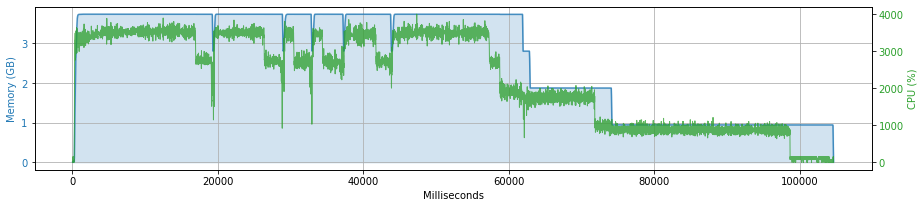

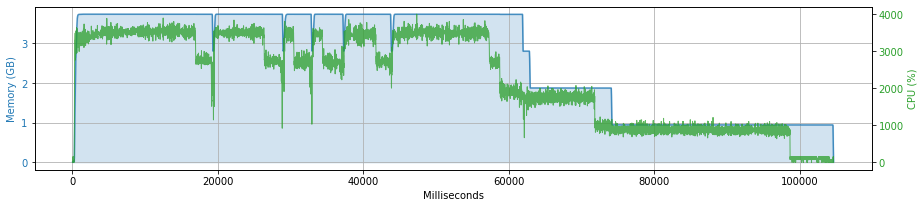

In [18]:
benchmark_results_mccortex.get_resources_plot()

In [29]:
command_bloom_filters = "parallel -j 12 -I% bigsi bloom -c berkleydb.yaml bigsi/%.ctx bigsi/%.bloom ::: " \
    + ' '.join(input_samples)
print(command_bloom_filters)

benchmark_results_bloom_filters = cmdbench.benchmark_command(command_bloom_filters)

print(benchmark_results_bloom_filters)
print(benchmark_results_bloom_filters.get_first_iteration())
print(get_last_n_lines(benchmark_results_bloom_filters.get_first_iteration().process.stdout_data, 10))

parallel -j 12 -I% bigsi bloom -c berkleydb.yaml bigsi/%.ctx bigsi/%.bloom ::: 2014C-3656 2014C-3907 2014C-3850 2014C-3857 2014C-3655 2014C-3600 2014C-3599 2014C-3598 2014C-3840
{
  'cpu': {
    'system_time': 30.21,
    'total_time': 6307.84,
    'user_time': 6277.63,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 3257456683,
    'total_bytes': 101810176,
    'total_chars': 3354136920,
    'write_bytes': 101810176,
    'write_chars': 96680237,
  },
  'memory': {
    'max': 15480799232,
    'max_perprocess': 5241012224,
  },
  'process': {
    'execution_time': 1455.78,
    'exit_code': 0,
    'stderr_data': '/home/CSCScience.ca/apetkau/miniconda3/envs/cmdbench/lib/python3.6/site-packages/bigsi/__main__.py:45:
                    ...(25 hidden lines)',
    'stdout_data': '',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 149.5,  69.6, ...,  73.1,   0. ,  65.3])
    'memory_bytes': array([ 8441856, 12132352, 15106048, ..., 83406848, 17575936, 17575936])
    'sampl

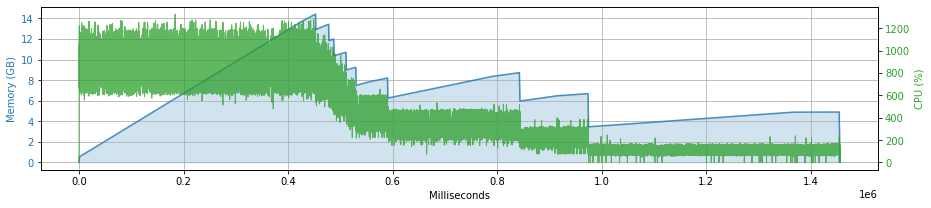

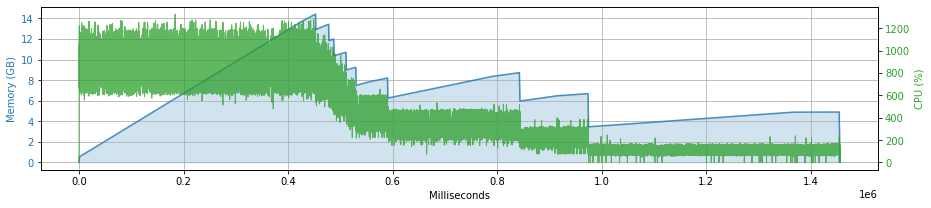

In [31]:
benchmark_results_bloom_filters.get_resources_plot()

In [41]:
# Index strain_1 and strain_2

bloom_files = ' '.join([f'bigsi/{s}.bloom' for s in input_samples])
samples_string = ' '.join([f'-s {s}' for s in input_samples])
command_index_bloom_filters = f'bigsi build -c berkleydb.yaml {samples_string} {bloom_files}'
benchmark_results_index_bloom_filters = cmdbench.benchmark_command(command_index_bloom_filters)
print(command_index_bloom_filters)
print(benchmark_results_index_bloom_filters.get_first_iteration())
print(get_last_n_lines(benchmark_results_index_bloom_filters.get_first_iteration().process.stdout_data, 10))

bigsi build -c berkleydb.yaml -s 2014C-3656 -s 2014C-3907 -s 2014C-3850 -s 2014C-3857 -s 2014C-3655 -s 2014C-3600 -s 2014C-3599 -s 2014C-3598 -s 2014C-3840 bigsi/2014C-3656.bloom bigsi/2014C-3907.bloom bigsi/2014C-3850.bloom bigsi/2014C-3857.bloom bigsi/2014C-3655.bloom bigsi/2014C-3600.bloom bigsi/2014C-3599.bloom bigsi/2014C-3598.bloom bigsi/2014C-3840.bloom
{
  'cpu': {
    'system_time': 305.31,
    'total_time': 1040.99,
    'user_time': 735.68,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 454329280689,
    'total_bytes': 157206642688,
    'total_chars': 908435548205,
    'write_bytes': 157206642688,
    'write_chars': 454106267516,
  },
  'memory': {
    'max': 1483259904,
    'max_perprocess': 1483259904,
  },
  'process': {
    'execution_time': 1047.91,
    'exit_code': 0,
    'stderr_data': '/home/CSCScience.ca/apetkau/miniconda3/envs/cmdbench/lib/python3.6/site-packages/bigsi/__main__.py:45:
                    ...(22 hidden lines)',
    'stdout_data': '{'result':

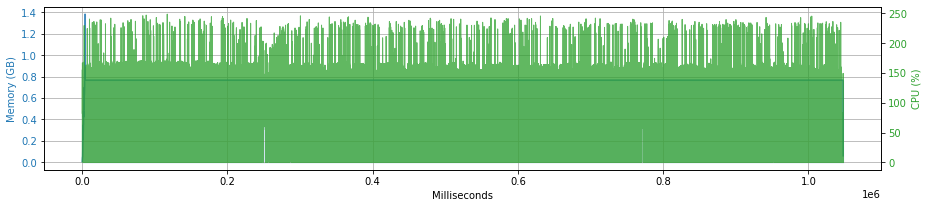

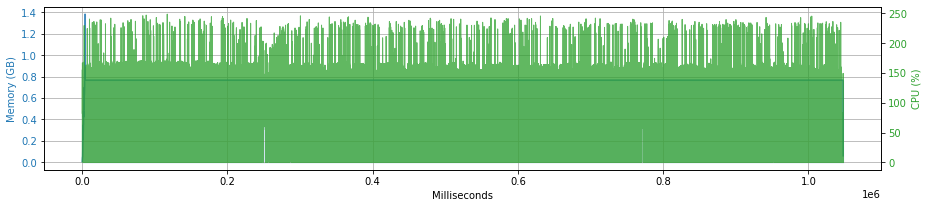

In [42]:
benchmark_results_index_bloom_filters.get_resources_plot()

In [45]:
# SEARCH

test_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"
command_search = "bigsi search {0} --config berkleydb.yaml -t 0.8".format(test_sequence)
benchmark_results_search = cmdbench.benchmark_command(command_search)
print(command_search)
print(benchmark_results_search.get_first_iteration())
print(get_last_n_lines(benchmark_results_search.get_first_iteration().process.stdout_data, 100))

bigsi search GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG --config berkleydb.yaml -t 0.8
{
  'cpu': {
    'system_time': 0.06999999999999999,
    'total_time': 0.61,
    'user_time': 0.54,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 8977449,
    'total_bytes': 0,
    'total_chars': 9094475,
    'write_bytes': 0,
    'write_chars': 117026,
  },
  'memory': {
    'max': 247128064,
    'max_perprocess': 66486272,
  },
  'process': {
    'execution_time': 0.69,
    'exit_code': 0,
    'stderr_data': '/home/CSCScience.ca/apetkau/miniconda3/envs/cmdbench/lib/python3.6/site-packages/bigsi/__main__.py:45:
                    ...(2 hidden lines)',
    'stdout_data': '{'query': 'GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG', 'threshold': 0.8,
                    'results': [{'percent_kmers_found': 100.0, 'num_kmers': 43, 'num_kmers_found': 43, 'sample_name':
                    ...(9 hidden lines)',
  },
  'time_series': {
   

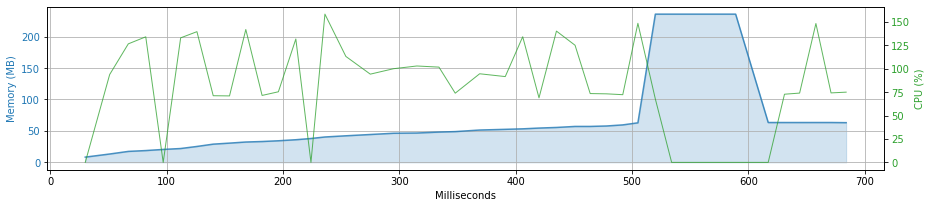

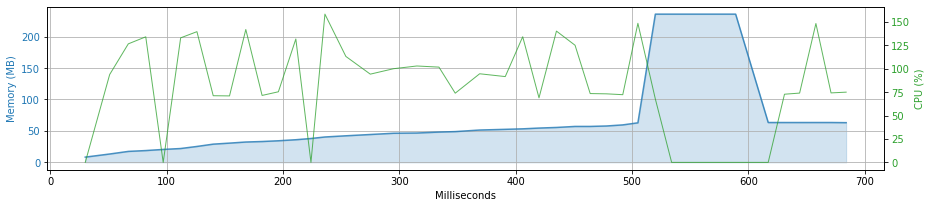

In [46]:
benchmark_results_search.get_resources_plot()